In [1]:
# https://youtu.be/5pGSJlaVZmY
# Data Augmentation and Gibbs Sampling
# https://www.stat.cmu.edu/~brian/905-2009/all-papers/tanner-wong-1987-with-disc.pdf

import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

steps = 2500
burn_in = math.ceil(steps / 2)

def dirichlet_draw(alpha1, alpha2, alpha3):
    return np.random.dirichlet((alpha1, alpha2, alpha3), 1)

def binomial_draw(n, p):
    return np.random.binomial(n, p, 1)

# Create two zero column vectors.
z1 = np.zeros(steps, )
z2 = np.zeros(steps, )

# Create a rectangular zero matrix of three columns.
ptheta = np.zeros((steps, 3))

# Flat prior for Dirichlet Distribution. 
# alpha = np.ones((steps, 3))

# y1_obs_ab, y2_obs_a, y3_obs_b, y4_obs_o
y_obs = [89, 642, 195, 657] 

# Initial values to seed sampler.
z1[0] = 50
z2[0] = 50
ptheta[0] = [0.3, 0.3, 0.3]

for each in range(1, steps):
    # z1 | y, Pa, Pb, Po => (z1 (Naa), conditioned on y, Pa, Pb, Po)
    # Marginal_prob_of_a_genotype
    p_z1 = ((ptheta[each - 1][0])**2) / (((ptheta[each - 1][0])**2) + (2*(ptheta[each - 1][0])*(ptheta[each - 1][2])))
    
    # z2 | y, Pa, Pb, Po => (z2 (Nbb), conditioned on y, Pa, Pb, Po)
    # Marginal_prob_of_b_genotype
    p_z2 = ((ptheta[each - 1][1])**2) / (((ptheta[each - 1][1])**2) + (2*(ptheta[each - 1][1])*(ptheta[each - 1][2])))  
    
    # z1 | y, Pa, Pb, Po ~ Bin(tot_obs_type_a, marginal_prob_of_a_genotype)
    # Conditional Distribution is Bin(n, p) since we're looking to find when the rv = a given number.
    z1[each] = binomial_draw(y_obs[1], p_z1)
    
    # z2 | y, Pa, Pb, Po ~ Bin(tot_obs_type_b, marginal_prob_of_b_genotype)
    # Conditional Distribution is Bin(n, p) since we're looking to find when the rv = a given number.
    z2[each] = binomial_draw(y_obs[2], p_z2)
    
    m1 = y_obs[0] + y_obs[1] + (z1[each])
    m2 = y_obs[0] + y_obs[2] + (z2[each])
    m3 = y_obs[1] + y_obs[2] - (z1[each]) + (2*y_obs[3])
    
    # Dirichlet parameters if a flat prior is used (i.e., alpha_i = 1)
    ptheta[each] = dirichlet_draw(m1, m2, m3)
    #ptheta[each] = dirichlet_draw((m1 + alpha[each][0]), (m2 + alpha[each][1]), (m3 + alpha[each][2]))
    
print('p_a_hat: {:0.5f}'.format(ptheta[burn_in:, 0].mean()))
print('p_b_hat: {:0.5f}'.format(ptheta[burn_in:, 1].mean()))
print('p_o_hat: {:0.5f}'.format(ptheta[burn_in:, 2].mean()))

p_a_hat: 0.26449
p_b_hat: 0.09333
p_o_hat: 0.64218


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


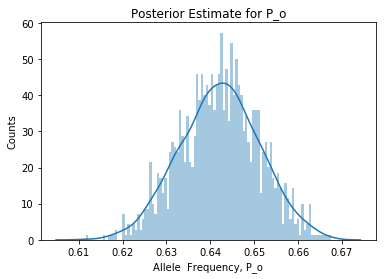

In [2]:
sns.distplot(ptheta[burn_in:, 2], bins=100, hist=True)
plt.title('Posterior Estimate for P_o')
plt.ylabel('Counts')
plt.xlabel('Allele  Frequency, P_o')
plt.show()

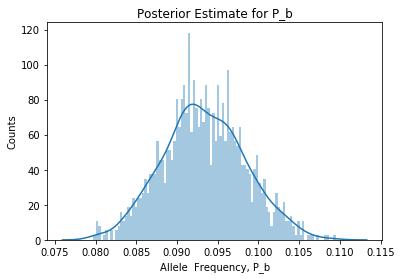

In [3]:
sns.distplot(ptheta[burn_in:, 1], bins=100, hist=True)
plt.title('Posterior Estimate for P_b')
plt.ylabel('Counts')
plt.xlabel('Allele  Frequency, P_b')
plt.show()

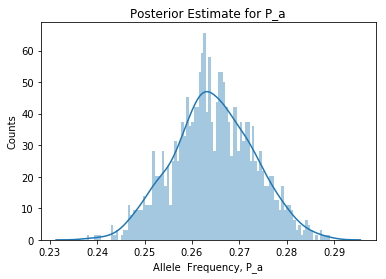

In [4]:
sns.distplot(ptheta[burn_in:, 0], bins=100, hist=True)
plt.title('Posterior Estimate for P_a')
plt.ylabel('Counts')
plt.xlabel('Allele  Frequency, P_a')
plt.show()